In [2]:
a = 10
b = 7
c = a + b
print(c)

17


In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy

In [5]:
pip install opencv--python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install scikit-learn keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Model Notebook

Import The Necessary Libraries

In [8]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [9]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop



If data has not downloaded yet, Dowload it from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

## Extract Data from the Dataset

In [10]:
fldr="./UTKFace"

In [11]:
import os
files=os.listdir(fldr)

## Create list of images in the Dataset

In [12]:
ages=[]
genders=[]
images=[]

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

## Create list of Age and Gender from the Dataset

In [13]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

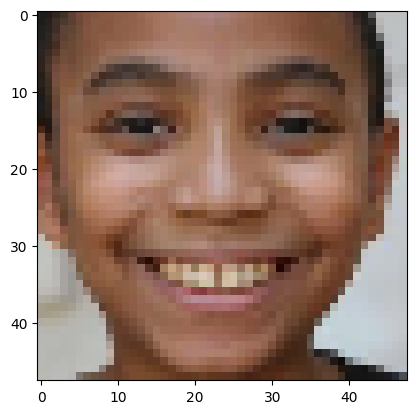

In [14]:
plt.imshow(images[87])

In [15]:
print(ages[87])


10


In [16]:
print(genders[87])

0


In [17]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [18]:
np.save(fldr+'image.npy', images_f)
np.save(fldr+'ages.npy', ages_f)
np.save(fldr+'genders.npy', genders_f)

## Finding the number of Elements in the Dataset

In [19]:
values,counts = np.unique(genders_f, return_counts = True)
print(counts)


[12391 11317]


## Plotting the number of Make and Female Samples

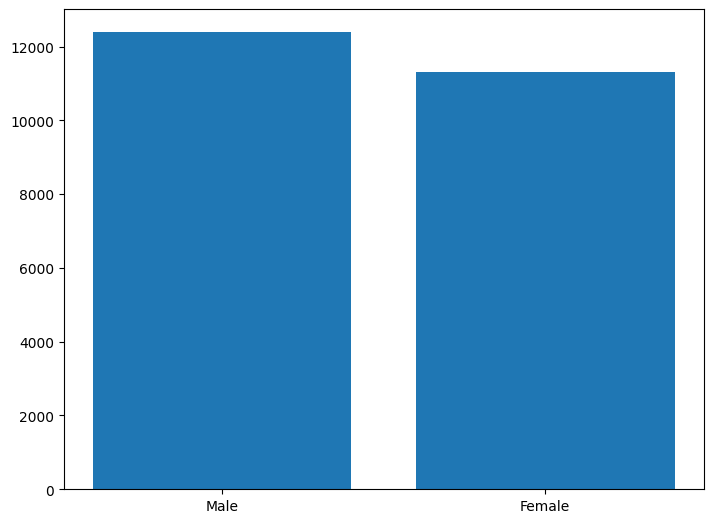

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [12391, 11317]
ax.bar(gender, values)
plt.show()

In [21]:
values,counts = np.unique(ages_f, return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Converting age counts to lists

In [22]:
val = values.tolist()
cnt = counts.tolist()

## Plotting the samples AgeWise

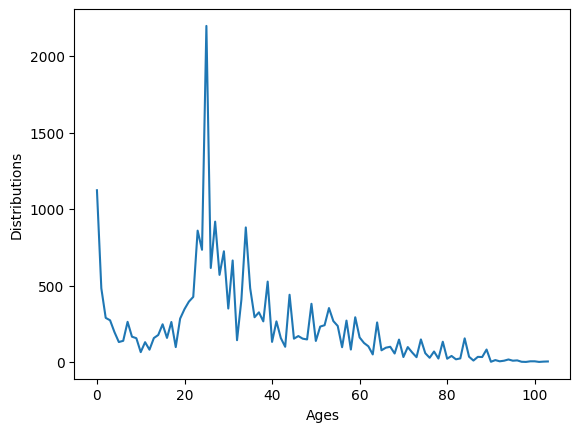

In [23]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distributions')
plt.show()

## Defining Labels for Ouput

In [24]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [25]:
images_f_2=images_f/255

In [26]:
images_f_2.shape

(23708, 48, 48, 3)

In [27]:
labels_f=np.array(labels)

In [28]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


## Splitting the Dataset into Test and Train

In [1]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [30]:
Y_train[0:5]

array([[28,  1],
       [40,  0],
       [ 6,  0],
       [86,  1],
       [38,  1]])

In [31]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]



In [32]:
Y_train_2[1][0:5]

array([28, 40,  6, 86, 38])

In [33]:
Y_train_2[0][0:5]

array([1, 0, 0, 1, 1])

## Defining the Model

In [36]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [39]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='linear', name='age_out')(drop_2)

    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(
        loss=["binary_crossentropy", "mae"],
        optimizer="Adam",
        metrics=["accuracy"],
    )

    return model

In [41]:
Model = model((48,48,3))

In [42]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 48, 48, 32)           896       ['input_3[0][0]']             
                                                                                                  
 dropout_7 (Dropout)         (None, 48, 48, 32)           0         ['conv2d_5[0][0]']            
                                                                                                  
 activation_5 (Activation)   (None, 48, 48, 32)           0         ['dropout_7[0][0]']           
                                                                                            

In [43]:
from keras.callbacks import ModelCheckpoint

In [44]:
fle_s = 'Age_Sex_Detection.h5'

checkpoint = ModelCheckpoint(
    fle_s,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights='True')
callback_list = [checkpoint, Early_stop]

In [45]:
History = Model.fit(X_train, Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=200,callbacks=callback_list)

Epoch 1/200
278/278 [==============================] - ETA: 0s - loss: 16.9903 - sex_out_loss: 0.6845 - age_out_loss: 16.1251 - sex_out_accuracy: 0.5632 - age_out_accuracy: 0.0472
Epoch 1: val_loss improved from inf to 16.51512, saving model to Age_Sex_Detection.h5


C:\Users\TEMP\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 86s 301ms/step - loss: 16.9903 - sex_out_loss: 0.6845 - age_out_loss: 16.1251 - sex_out_accuracy: 0.5632 - age_out_accuracy: 0.0472 - val_loss: 16.5151 - val_sex_out_loss: 0.6660 - val_age_out_loss: 15.6914 - val_sex_out_accuracy: 0.6425 - val_age_out_accuracy: 0.0472
Epoch 2/200
278/278 [==============================] - ETA: 0s - loss: 14.1904 - sex_out_loss: 0.5972 - age_out_loss: 13.4066 - sex_out_accuracy: 0.6828 - age_out_accuracy: 0.0473
Epoch 2: val_loss improved from 16.51512 to 12.38153, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 91s 328ms/step - loss: 14.1904 - sex_out_loss: 0.5972 - age_out_loss: 13.4066 - sex_out_accuracy: 0.6828 - age_out_accuracy: 0.0473 - val_loss: 12.3815 - val_sex_out_loss: 0.5526 - val_age_out_loss: 11.6066 - val_sex_out_accuracy: 0.7356 - val_age_out_accuracy: 0.0471
Epoch 3/200
278/278 [==============================] - ETA: 0s - loss: 11.7337 - sex_out_loss: 0.5274 - a

In [47]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 5s 25ms/step - loss: 8.1673 - sex_out_loss: 0.2681 - age_out_loss: 6.7825 - sex_out_accuracy: 0.8942 - age_out_accuracy: 0.0472


[8.167340278625488,
 0.2680700719356537,
 6.782471179962158,
 0.8942129015922546,
 0.047241438180208206]

In [48]:
pred = Model.predict(X_test)

186/186 [==============================] - 4s 22ms/step


In [49]:
pred[1]

array([[30.85306  ],
       [26.98357  ],
       [ 2.6016078],
       ...,
       [41.529385 ],
       [25.24195  ],
       [24.053669 ]], dtype=float32)

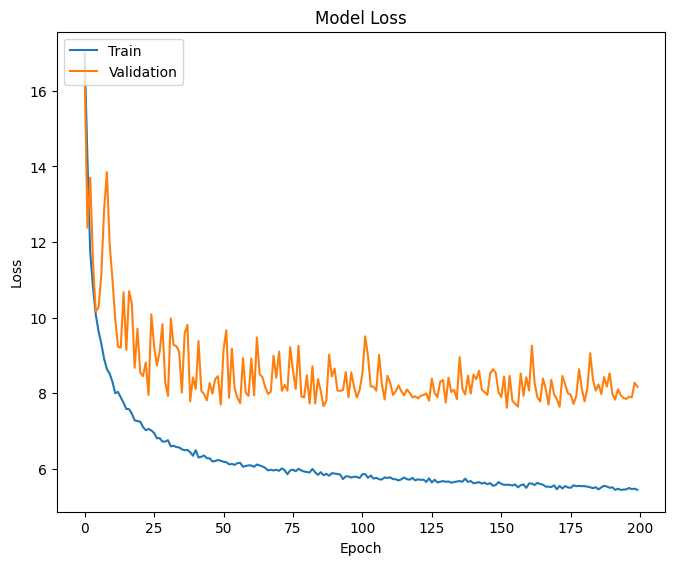

In [50]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

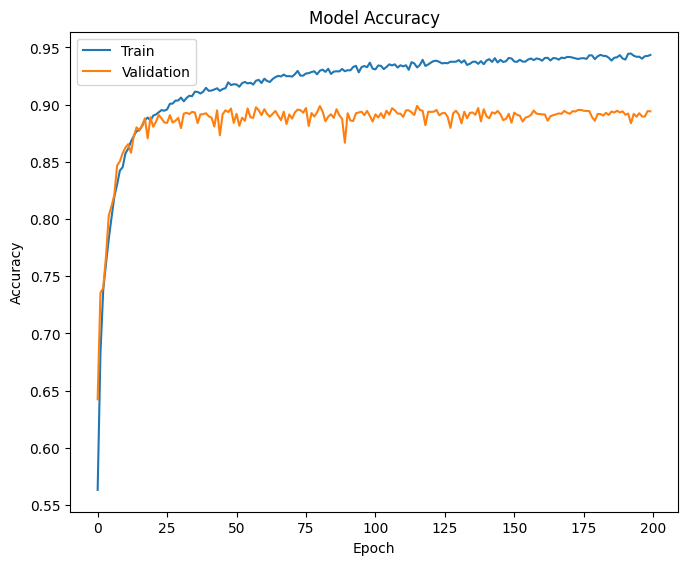

In [51]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

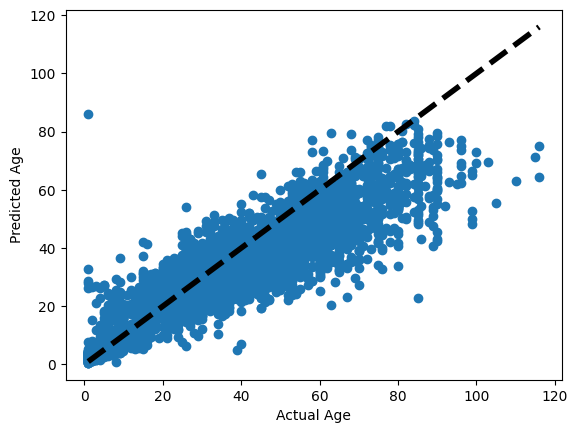

In [54]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(),Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [55]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
report = classification_report(Y_test_2[0], Pred_l)

In [58]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3059
           1       0.88      0.90      0.89      2868

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [62]:
results = confusion_matrix(Y_test_2[0], Pred_l)

In [60]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


<Axes: >

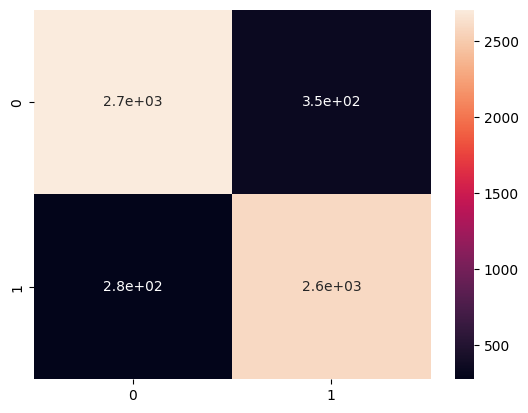

In [63]:
import seaborn as sns 
sns.heatmap(results, annot=True)

In [2]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+sex_f[sex])
    

In [3]:
test_image(7654, images_f, images_f_2, Model)

NameError: name 'images_f' is not defined

1/1 [==============================] - 0s 28ms/step
Predicted Age is 21
Predicted Gender is Female


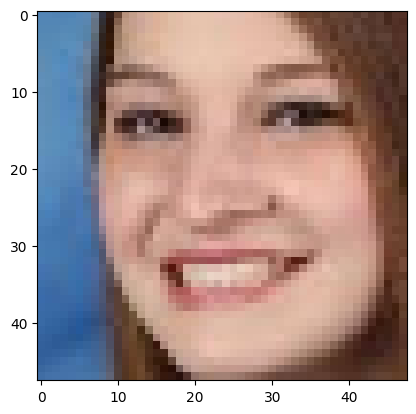

In [76]:
test_image(1288, images_f, images_f_2, Model)

In [1]:
test_image(23, images_f, images_f_2, Model)

NameError: name 'test_image' is not defined